<a href="https://colab.research.google.com/github/2303A51155/2025BT17-18/blob/main/Assignment-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('/content/Classified_Data.txt')
data_types = df.dtypes
print("Data Types of each feature:\n", data_types)
summary = df.describe(percentiles=[.25, .5, .75, .9])
print("\nSummary of the dataset:\n", summary)
columns = df.columns.tolist()
print("\nColumns/Features in the dataset:\n", columns)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nScaled Features:\n", X_scaled_df.head())

Data Types of each feature:
 Unnamed: 0        int64
WTT             float64
PTI             float64
EQW             float64
SBI             float64
LQE             float64
QWG             float64
FDJ             float64
PJF             float64
HQE             float64
NXJ             float64
TARGET CLASS      int64
dtype: object

Summary of the dataset:
         Unnamed: 0          WTT          PTI          EQW          SBI  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    499.500000     0.949682     1.114303     0.834127     0.682099   
std     288.819436     0.289635     0.257085     0.291554     0.229645   
min       0.000000     0.174412     0.441398     0.170924     0.045027   
25%     249.750000     0.742358     0.942071     0.615451     0.515010   
50%     499.500000     0.940475     1.118486     0.813264     0.676835   
75%     749.250000     1.163295     1.307904     1.028340     0.834317   
90%     899.100000     1.336612     1.441901     1.

part-2

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42) # Changed df_feat to X_scaled_df
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("KNN model has been fitted to the training data.")

Training set size: 800
Testing set size: 200
KNN model has been fitted to the training data.


part-3

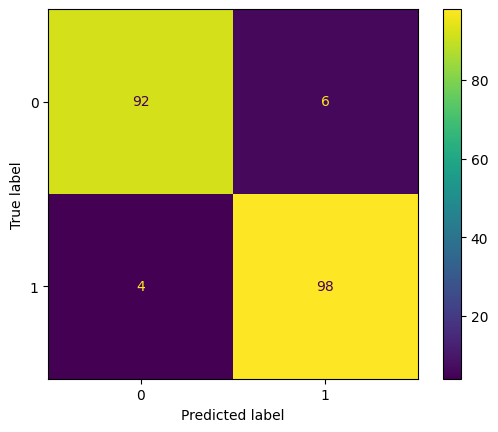

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        98
           1       0.94      0.96      0.95       102

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Assuming 'knn' is your fitted KNN model and 'X_test' and 'y_test' are your test data
y_pred = knn.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)